# 첫 번째 심층 신경망

## 라이브러리 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

## 데이터 적재

In [2]:
NUM_CLASSES = 10 # cifar의 10개의 클래스로 정함

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [8]:
print(np.shape(x_train), np.shape(x_test), np.shape(y_train), np.shape(y_test))
# x_train: 50000개의 데이터가 32by32의 이미지로 RGB필드에 구성되어있음
# x_test: 10000개의 데이터가 32by32의 이미지로 RGB필드에 구성되어있음
# y_train: 50000개의 데이터가 각자의 클래스로 구성이 되어있음
# y_test: 10000개의 데이터가 각자의 클래스롤 구성이 되어있음

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [11]:
# x_train, x_test의 RGB값은 0~255이므로 이를 표준화시키기
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# one-hot encoding을 to_categorical로 구현
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

## 모델 만들기

In [13]:
input_layer = Input((32,32,3)) # input layer에는 32by32 RGB이미지를 전달

x = Flatten()(input_layer) # 32x32x3을 일렬로 펴기

x = Dense(200, activation = 'relu')(x) # 첫번째는 200개의 유닛을 가진 layer와 relu를 사용한 선형결합
x = Dense(150, activation = 'relu')(x) # 150개의 유닛을 가진 layer

# softmax를 통해 10개의 클래스에 대한 x의 각각의 가능성을 구하기
output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

# 모델 이어주면서 완성하기
model = Model(input_layer, output_layer)

Tensor("flatten_1/Reshape:0", shape=(None, 3072), dtype=float32)


In [14]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


## 모델 컴파일

In [9]:
opt = Adam(lr=0.0005) # Adam optimizer사용
# loss function은 categorical crossentropy사용, opmizer
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

## 모델 훈련

In [10]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

# batch_size: 샘플을 32개씩 추출하여 사용
# epochs: 모든 샘플이 반복될 때까지가 1회
# shuffle: 중복 허용x, 랜덤하게 추출

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8402 - accuracy: 0.3359
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6635 - accuracy: 0.4046
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5891 - accuracy: 0.4338
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5383 - accuracy: 0.4533
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4961 - accuracy: 0.4688
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4638 - accuracy: 0.4791
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4339 - accuracy: 0.4881
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4080 - accuracy: 0.4994
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3828 - accuracy: 0.5081
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.368

## 모델 평가

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 1.4144 - accuracy: 0.4996


[1.4143937826156616, 0.49959999322891235]

In [12]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)] 
actual_single = CLASSES[np.argmax(y_test, axis = -1)]
# 가장 확률이 큰 것으로 추출하고 axis는 마지막 차원에 맞춰서 반환

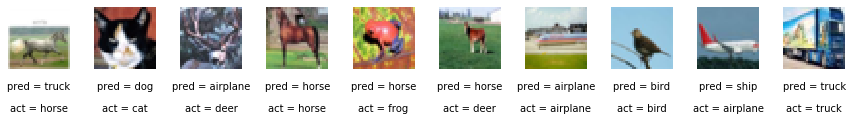

In [13]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
